In [1]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import random

import numpy as np

import matplotlib.cm as cm

import pickle

from utils import functions

# parameters setup 
from global_vars import global_vars

%matplotlib notebook

import os

In [2]:
# restoring variables from memory (GT images, indices)
%store -r

In [3]:
# opening GT images 
with open('pickled_data/EVAL/un_noised_images_eval_27_06.pkl', 'rb') as un_noised_images_eval_27_06_pickled:
    un_noised_images = pickle.load(un_noised_images_eval_27_06_pickled)
#with open('pickled_data/EVAL/noised_images_eval_27_06.pkl', 'rb') as noised_images_eval_27_06_pickled:
    #noised_images = pickle.load(noised_images_eval_27_06_pickled)

In [4]:
# collecting CARE-predicted images into a tensor, ensuring appropriate omage loactions relative to GT images
import glob
import fnmatch
from tifffile import imread

#path at which the predicted images are stored 
path = 'tiffed_data/predictions/CARE'

predicted_images = os.listdir(path)
predicted_images_len = len(predicted_images)

predicted_images_tensor = torch.zeros_like(un_noised_images)
for n in range(0,20):
    noised_imgs_n_list = glob.glob('tiffed_data/predictions/CARE/{}_*_*.tif'.format(n))
    for m in range(0,20):
        noised_imgs_m_list = fnmatch.filter(noised_imgs_n_list, 'tiffed_data/predictions/CARE/{}_{}_*.tif'.format(n, m))
        for i in range(0,50):
            img_i_path = fnmatch.filter(noised_imgs_m_list, 'tiffed_data/predictions/CARE/{}_{}_{}.tif'.format(n,m,i))[0]
            #print(img_i_path)
            xy = torch.tensor(imread(img_i_path))
            predicted_images_tensor[n,m,i,:,:] = xy
            

In [5]:
# storing the predicted_images_tensor
predicted_images_tensor_pickled = pickle.dump(predicted_images_tensor, open("pickled_data/EVAL/predicted_images_tensor.pkl", 'wb'), protocol=4)
%store predicted_images_tensor_pickled

Stored 'predicted_images_tensor_pickled' (NoneType)


In [6]:
# CARE: -NRMSE-
# 4a. Computing NRMSE for each GT-CARE_prediction image pair in the data collection
# dims=[m, n, reps]
metric_output = functions.NRMSE_compute(un_noised_images, predicted_images_tensor)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_NRMSE_CARE = functions.set_mean_std_compute(metric_output)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# CARE: -RMSE-
# 4b. Computing RMSE for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.RMSE_compute(un_noised_images, predicted_images_tensor)

#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_RMSE_CARE = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# CARE: -PSNR- 
# 4c. Computing PSNR for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.PSNR_compute(un_noised_images, predicted_images_tensor)

#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_PSNR_CARE = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# CARE: -SSIM- 
# 4c. Computing SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.SSIM_compute(un_noised_images, predicted_images_tensor)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_SSIM_CARE = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# CARE: -MS_SSIM-
# 4c. Computing MS_SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.MS_SSIM_compute(un_noised_images, predicted_images_tensor)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_MS_SSIM_CARE = functions.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


In [19]:
%store metric_stats_NRMSE_CARE
%store metric_stats_RMSE_CARE
%store metric_stats_PSNR_CARE
%store metric_stats_SSIM_CARE
%store metric_stats_MS_SSIM_CARE

Stored 'metric_stats_NRMSE_CARE' (Tensor)
Stored 'metric_stats_RMSE_CARE' (Tensor)
Stored 'metric_stats_PSNR_CARE' (Tensor)
Stored 'metric_stats_SSIM_CARE' (Tensor)
Stored 'metric_stats_MS_SSIM_CARE' (Tensor)


<IPython.core.display.Javascript object>


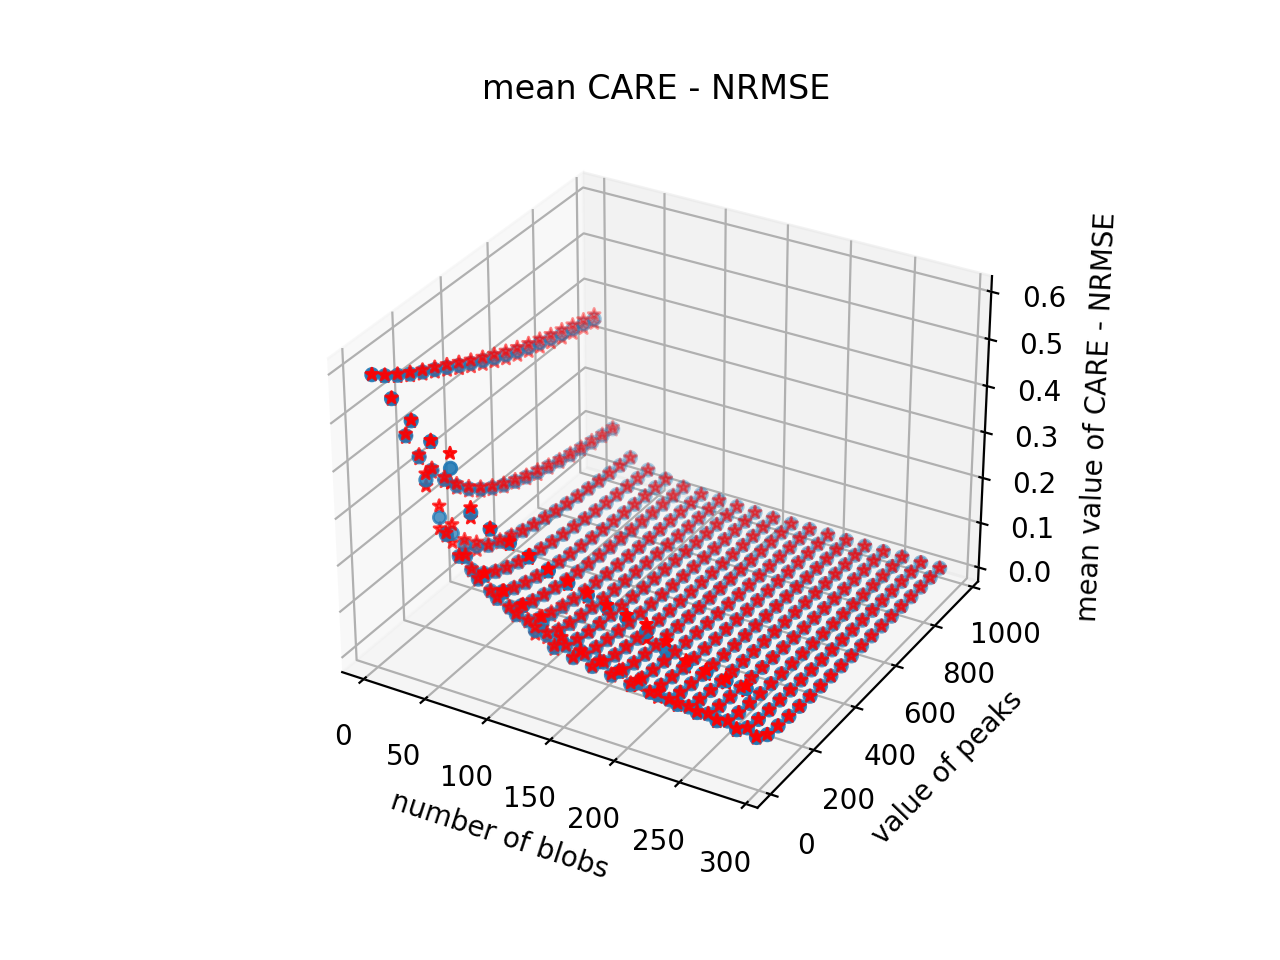

<IPython.core.display.Javascript object>


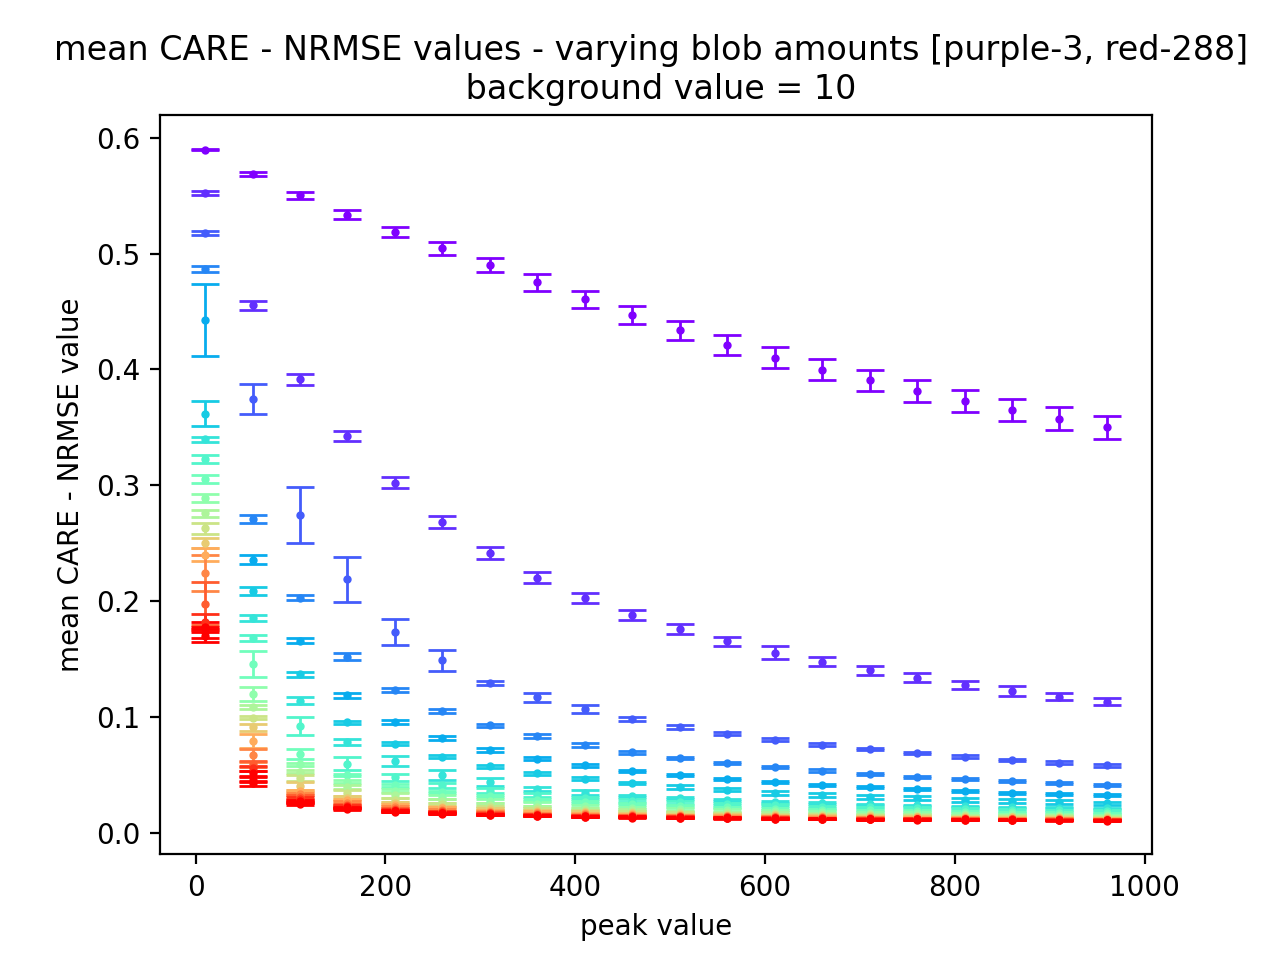

<IPython.core.display.Javascript object>


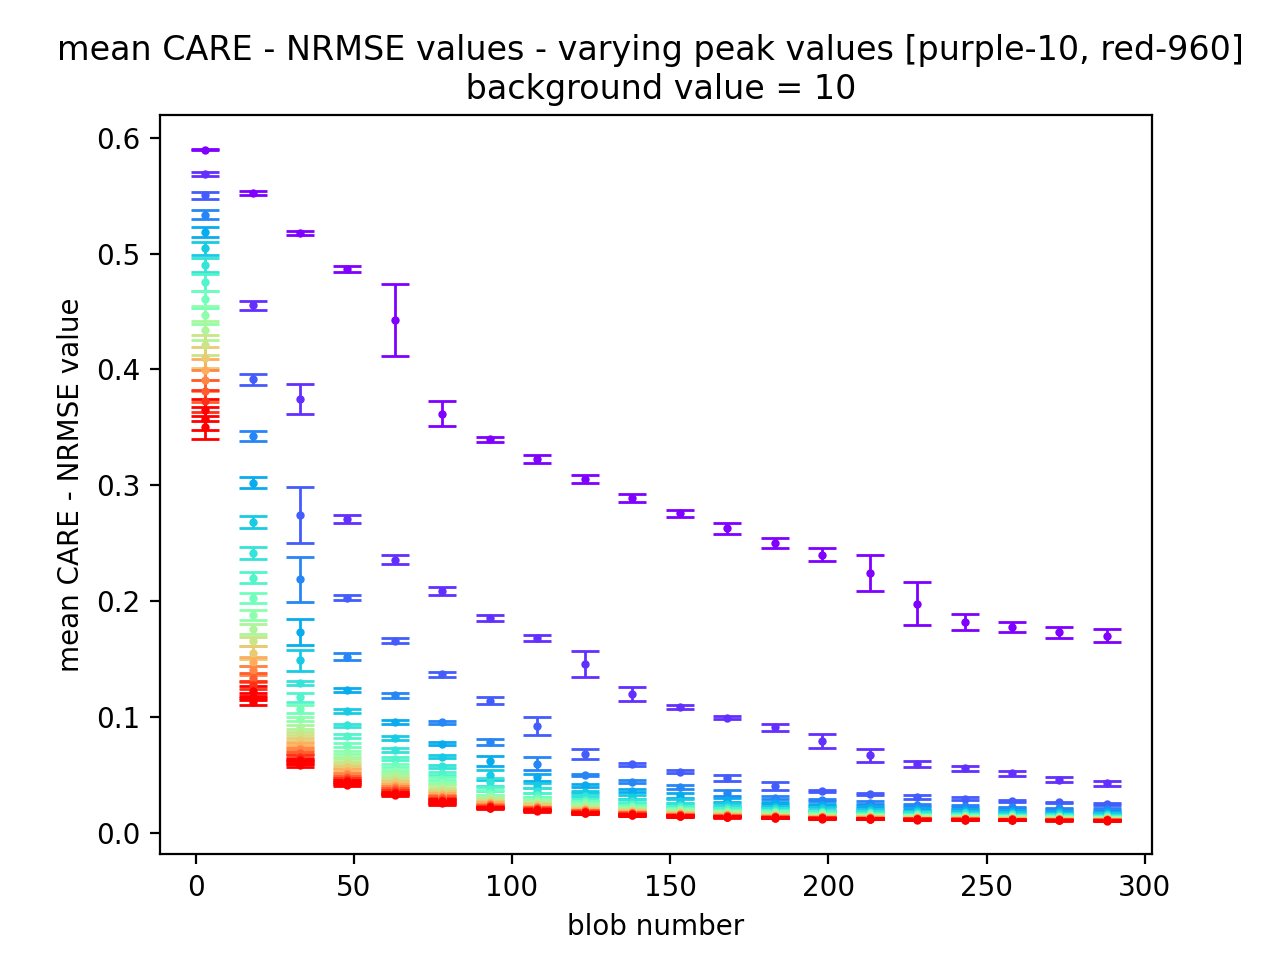

In [11]:
# CARE: -NRMSE-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_NRMSE_CARE, indices, 'CARE - NRMSE')

<IPython.core.display.Javascript object>


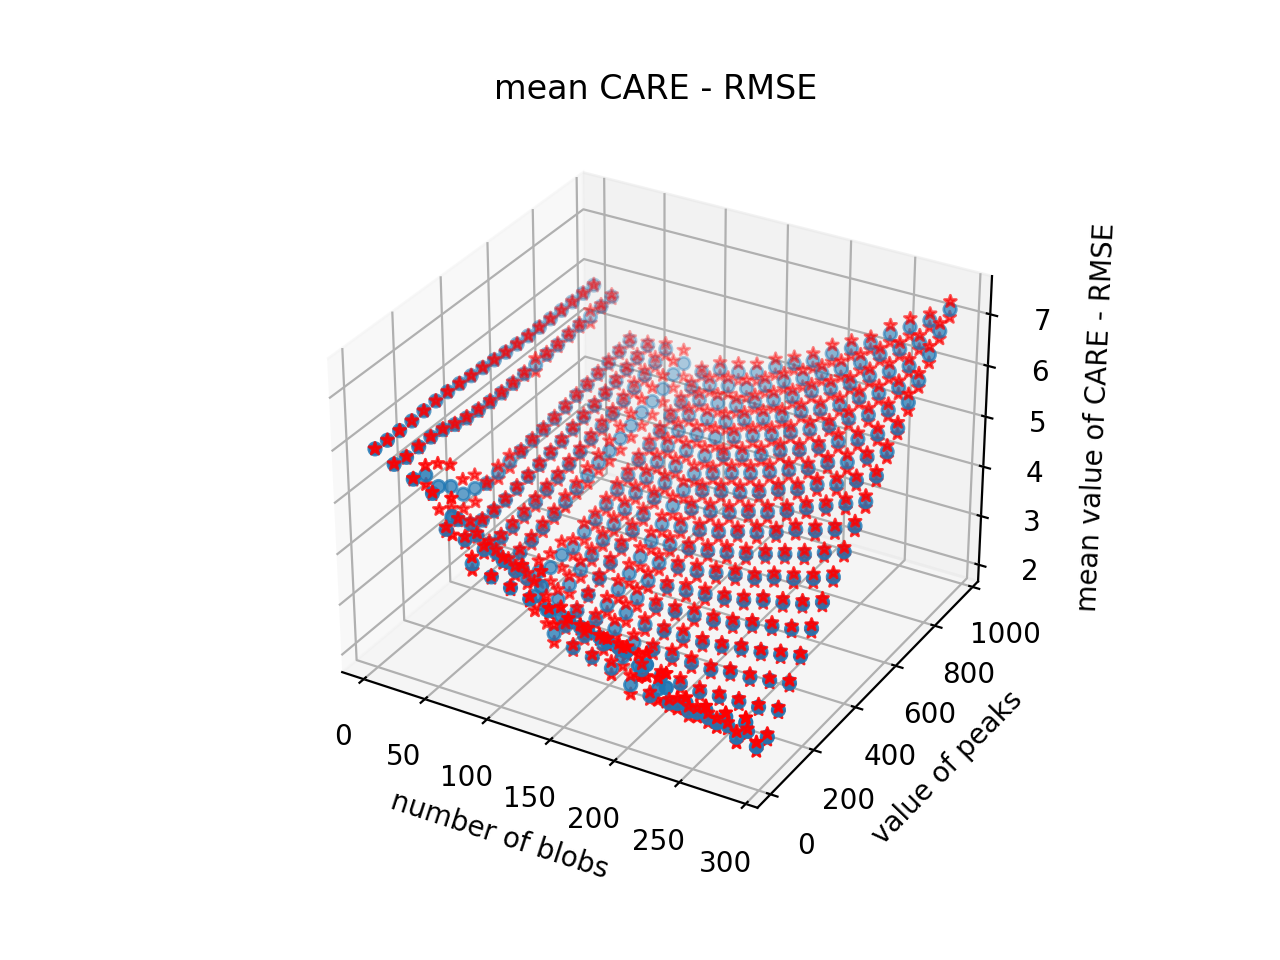

<IPython.core.display.Javascript object>


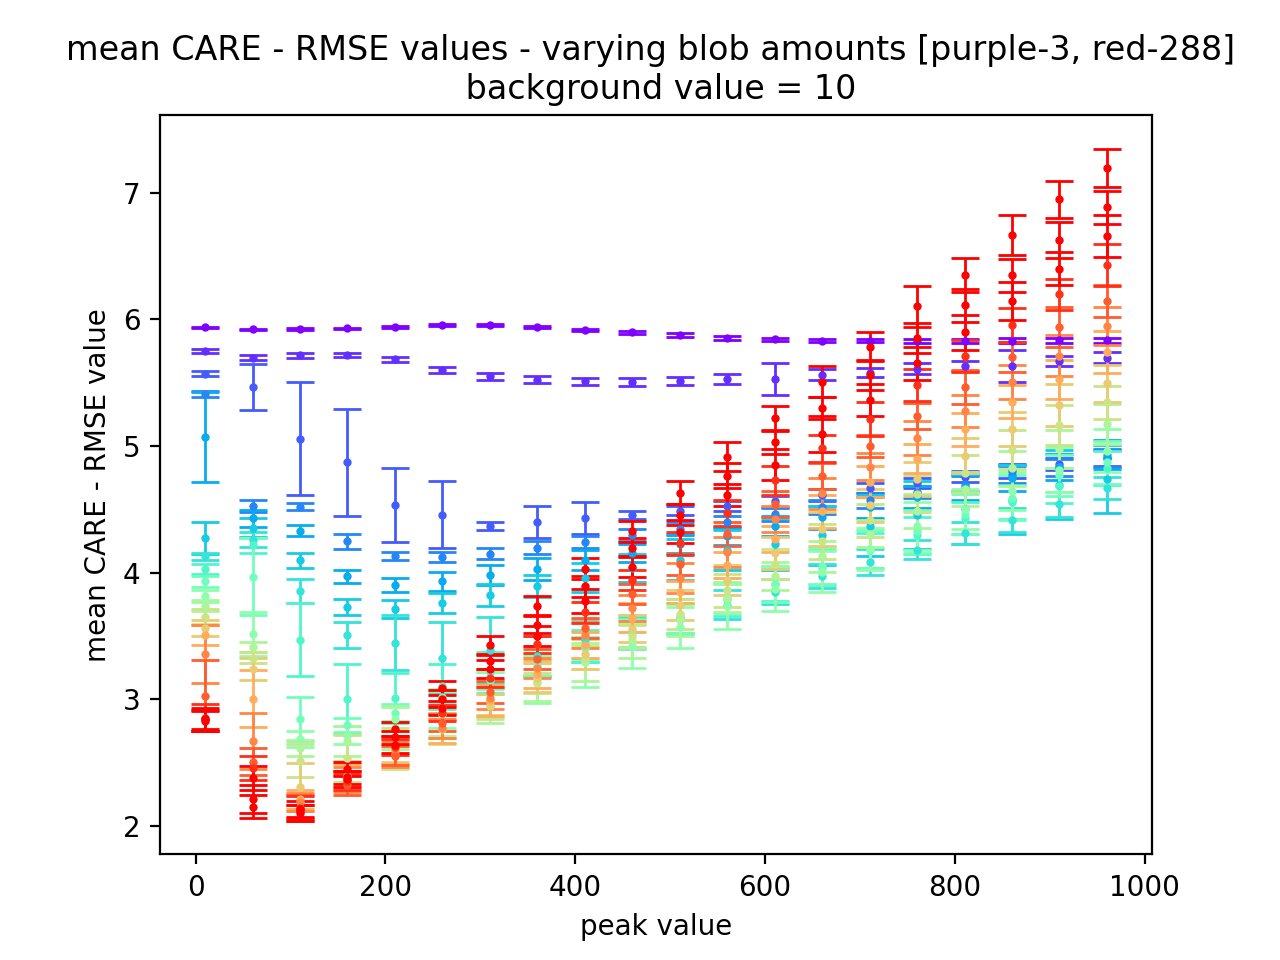

<IPython.core.display.Javascript object>


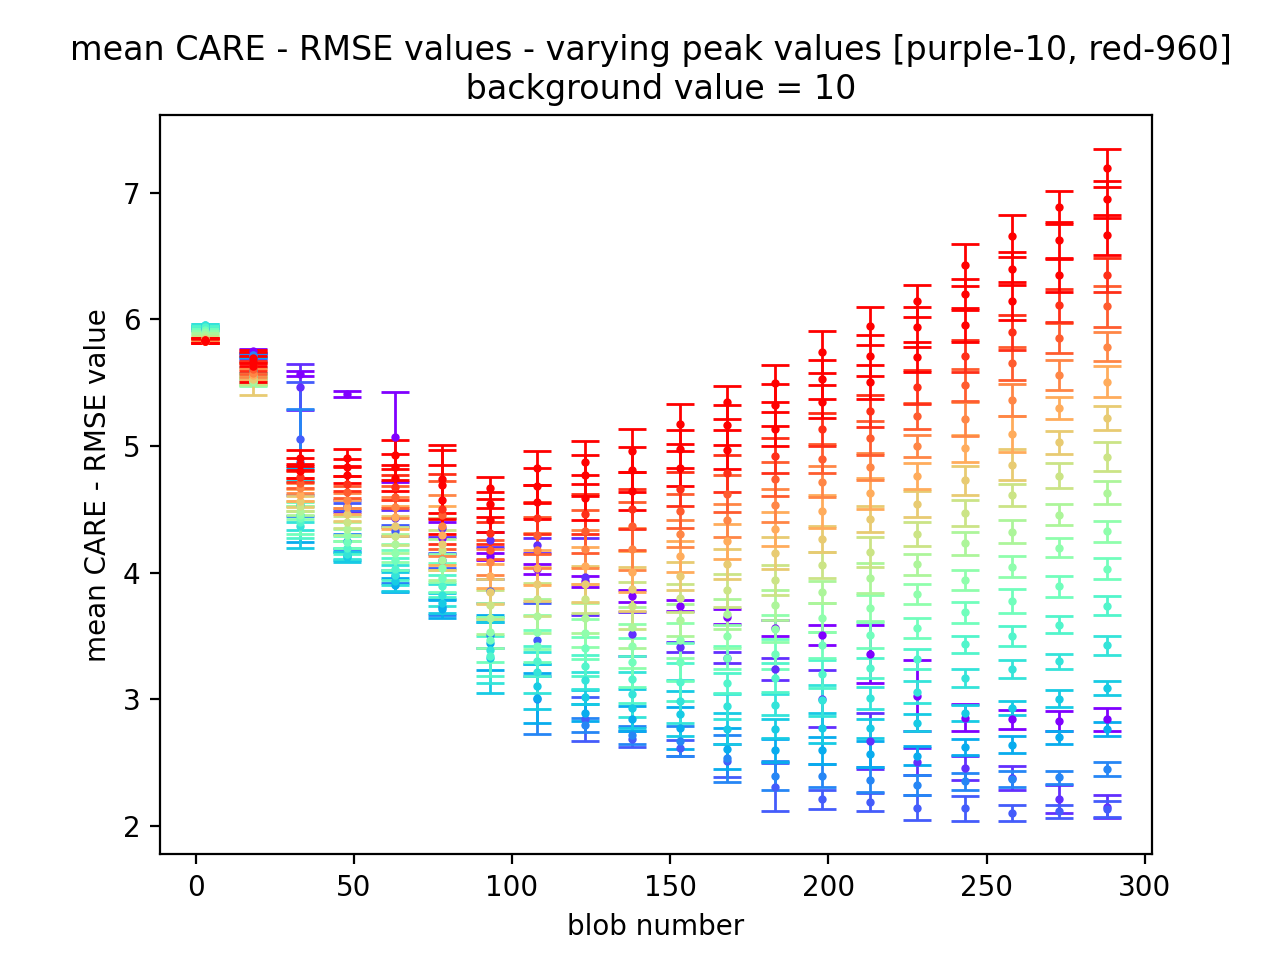

In [12]:
# CARE: -RMSE-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_RMSE_CARE, indices, 'CARE - RMSE')

<IPython.core.display.Javascript object>


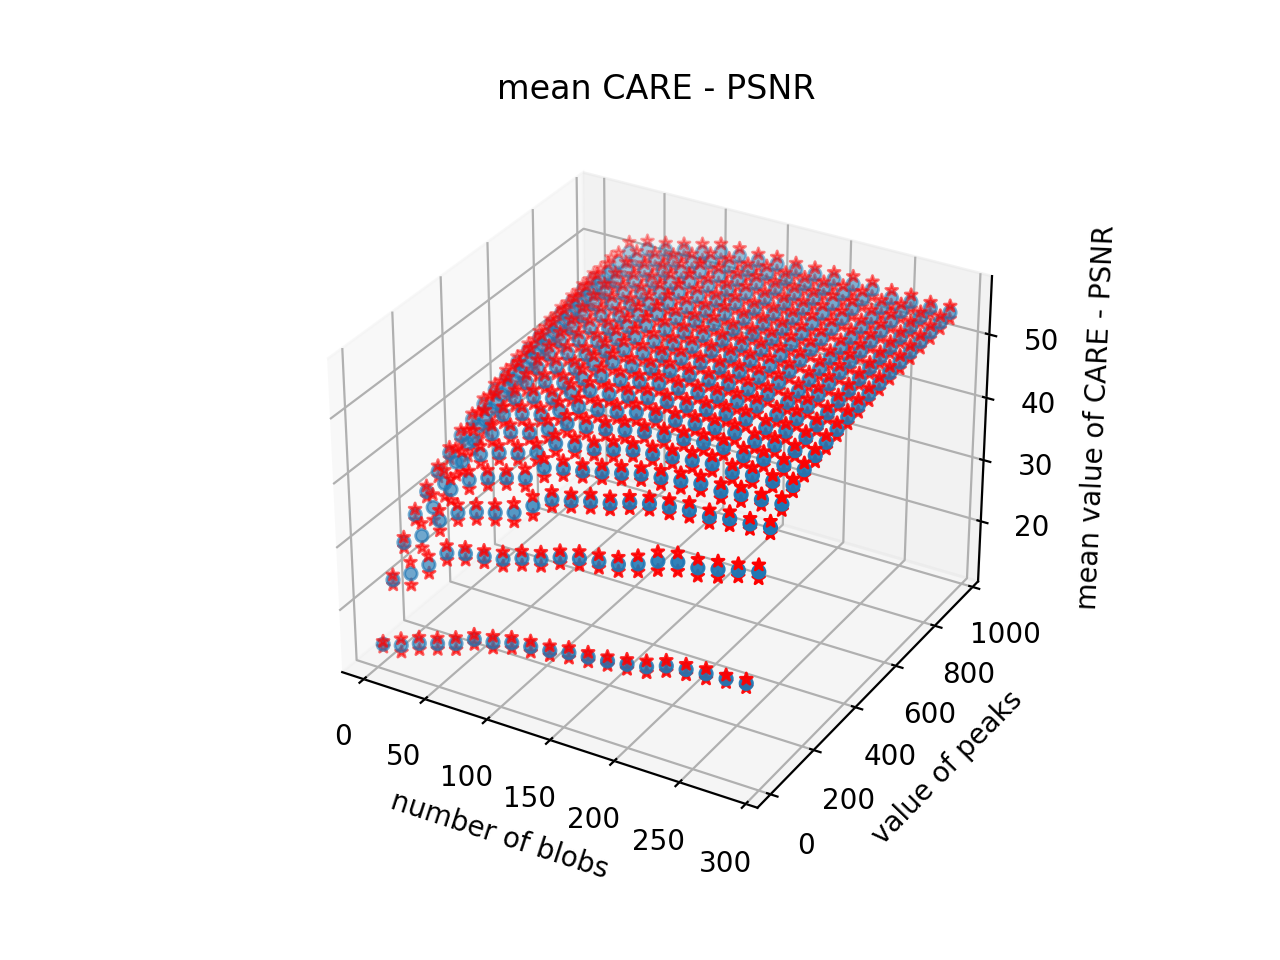

<IPython.core.display.Javascript object>


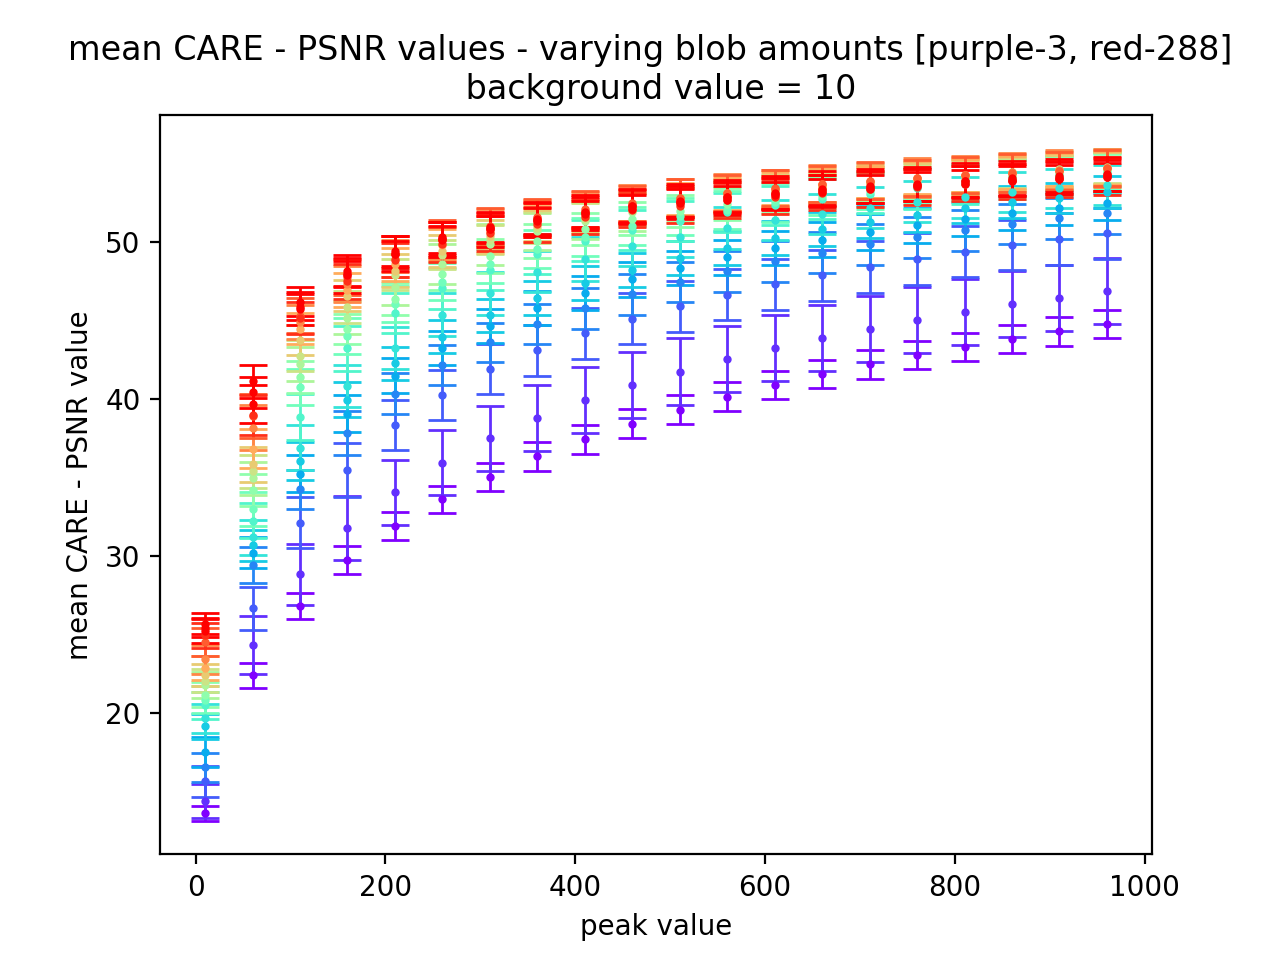

<IPython.core.display.Javascript object>


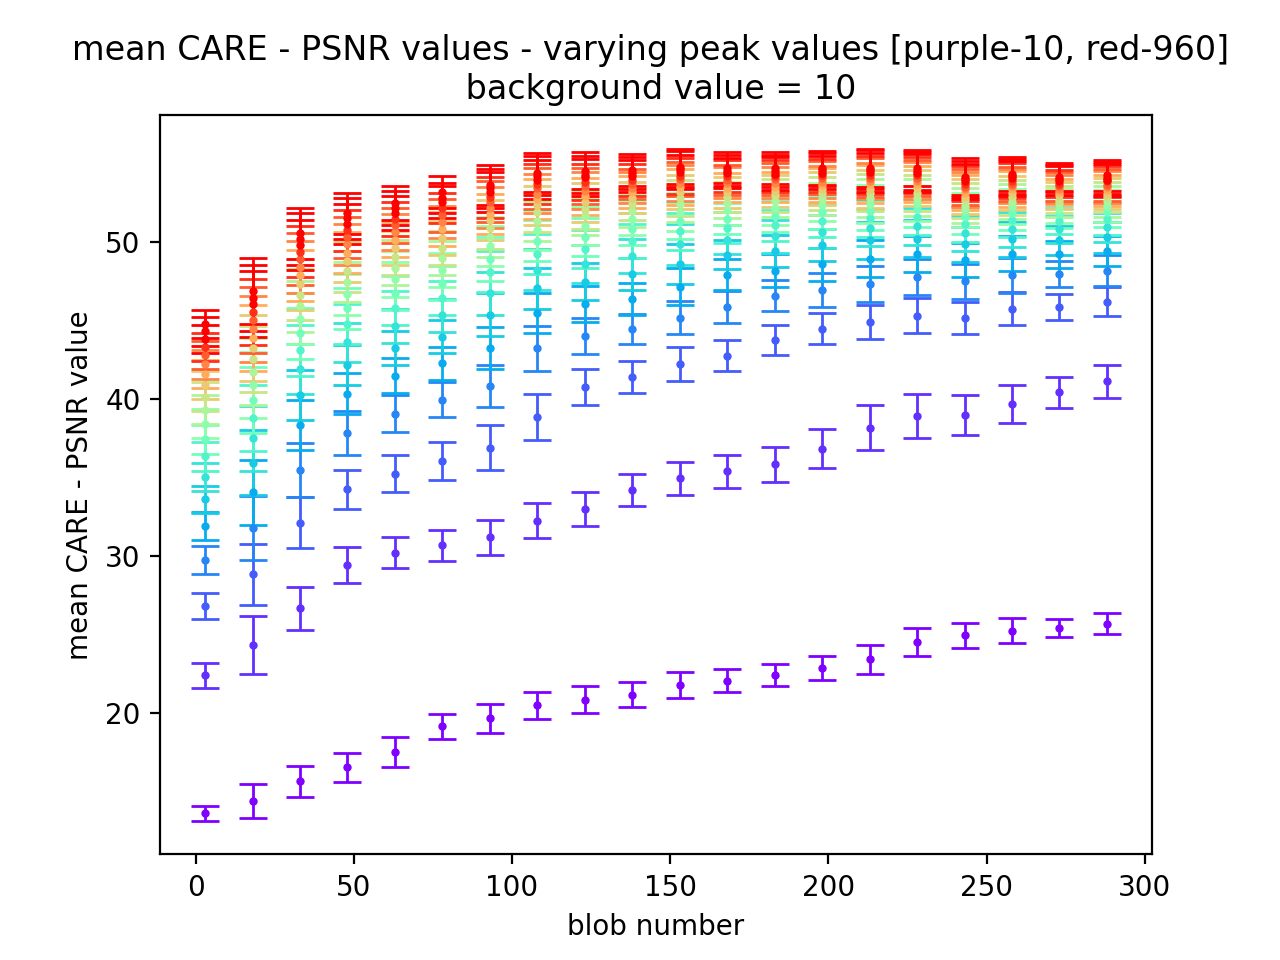

In [16]:
# CARE: -PSNR-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_PSNR_CARE, indices, 'CARE - PSNR')

<IPython.core.display.Javascript object>


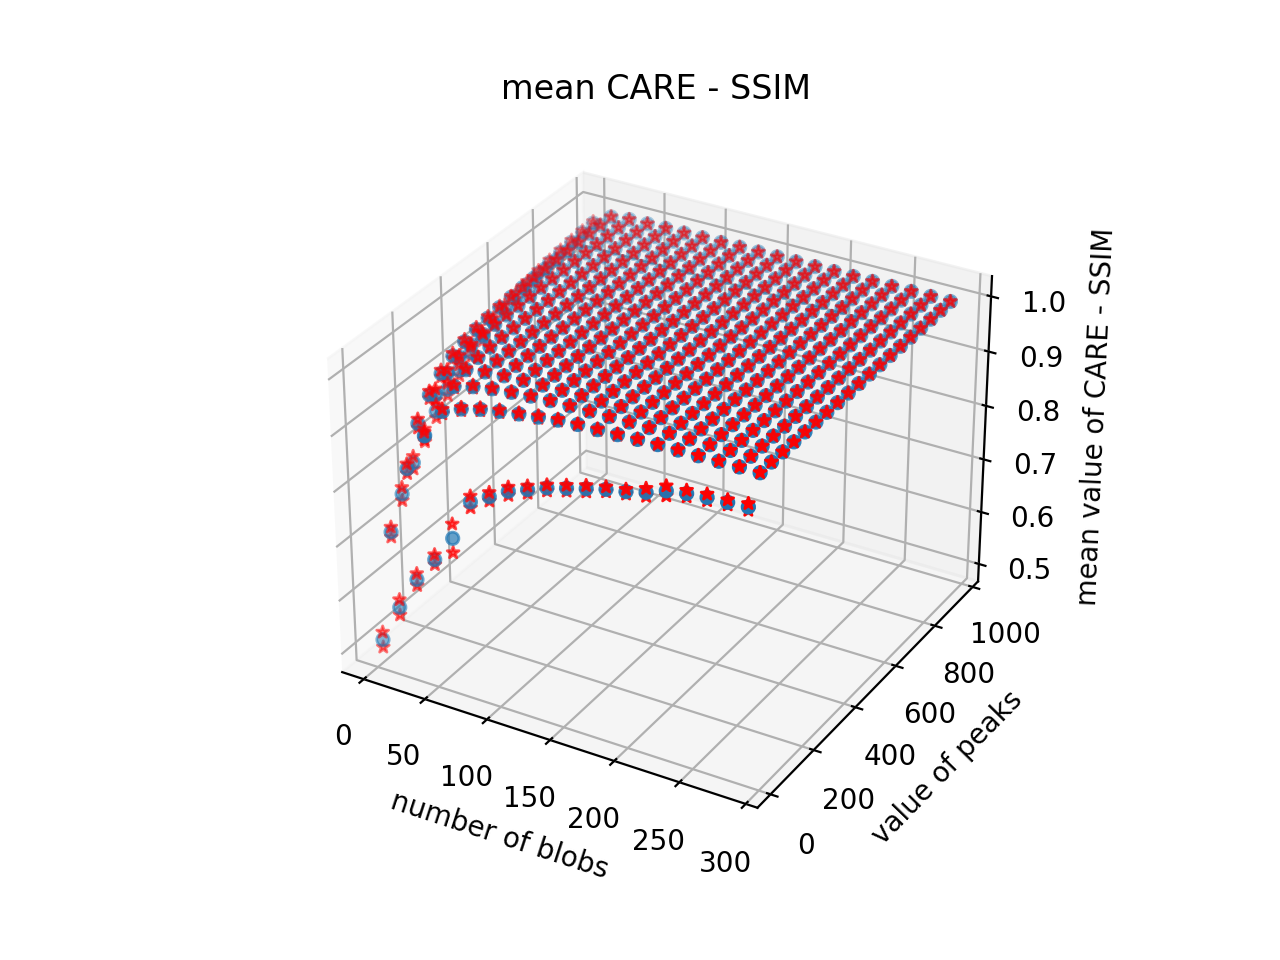

<IPython.core.display.Javascript object>


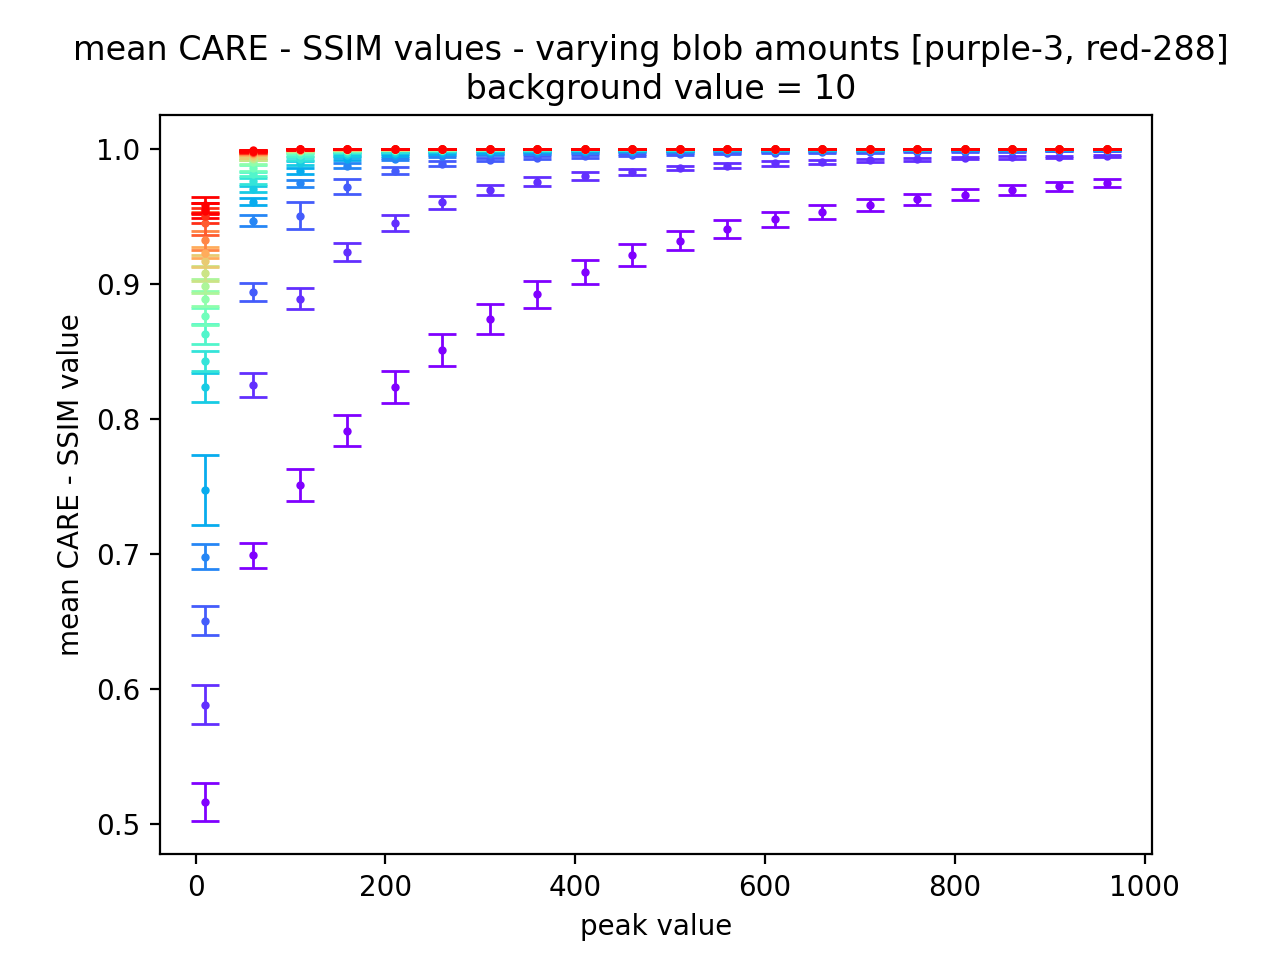

<IPython.core.display.Javascript object>


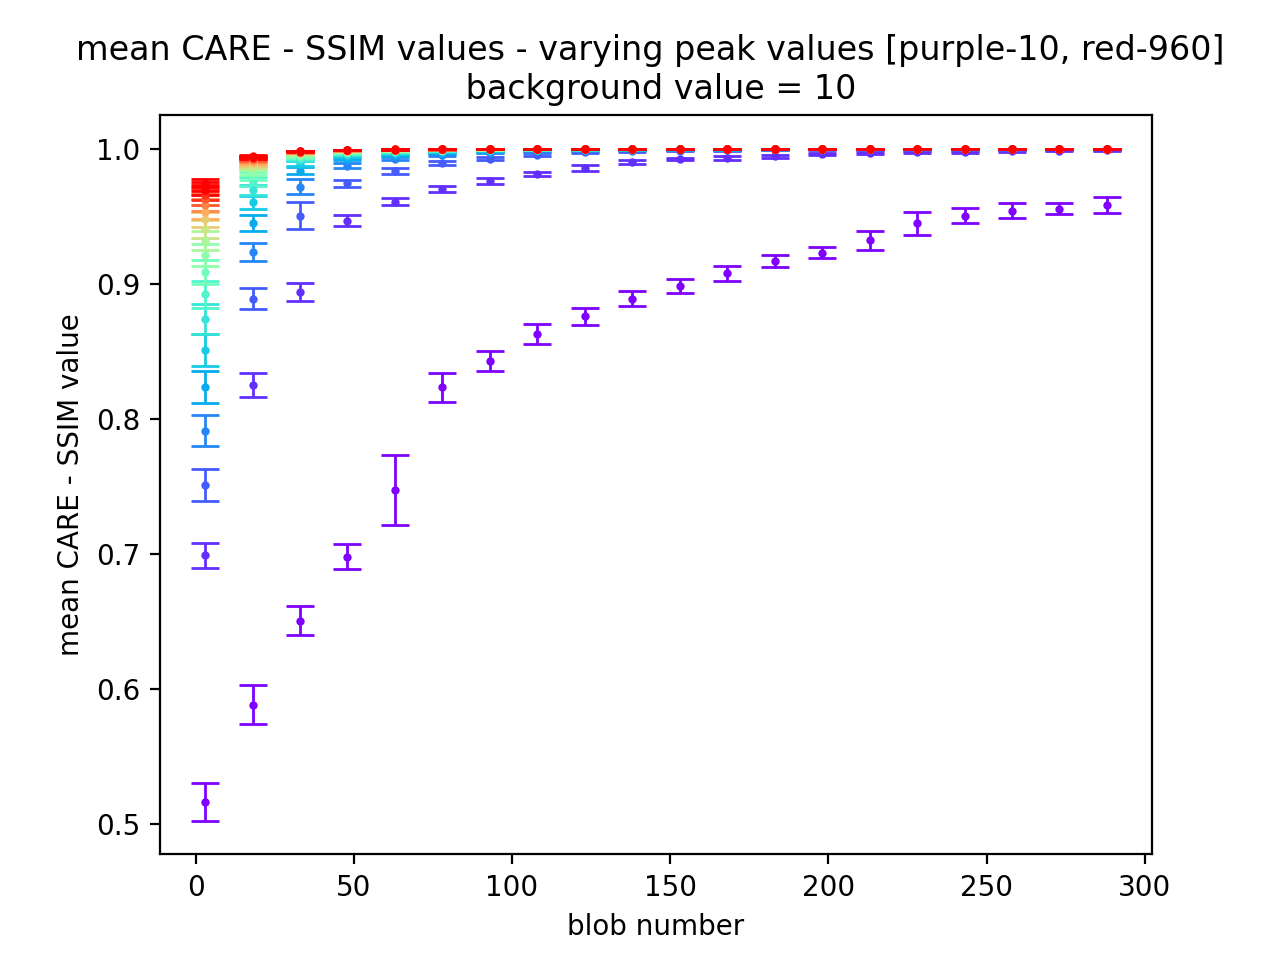

In [17]:
# CARE: -SSIM-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_SSIM_CARE, indices, 'CARE - SSIM')

<IPython.core.display.Javascript object>


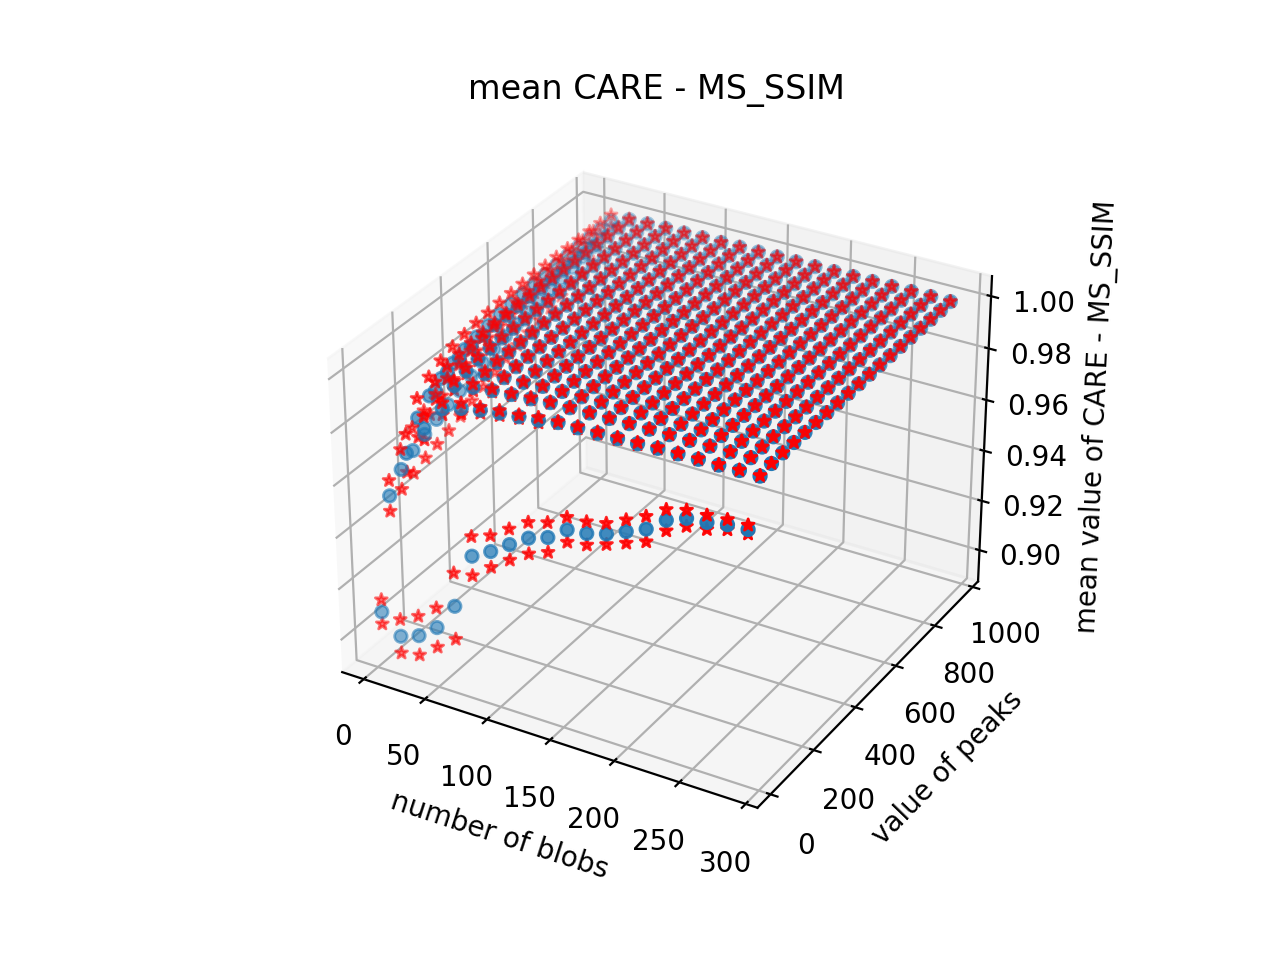

<IPython.core.display.Javascript object>


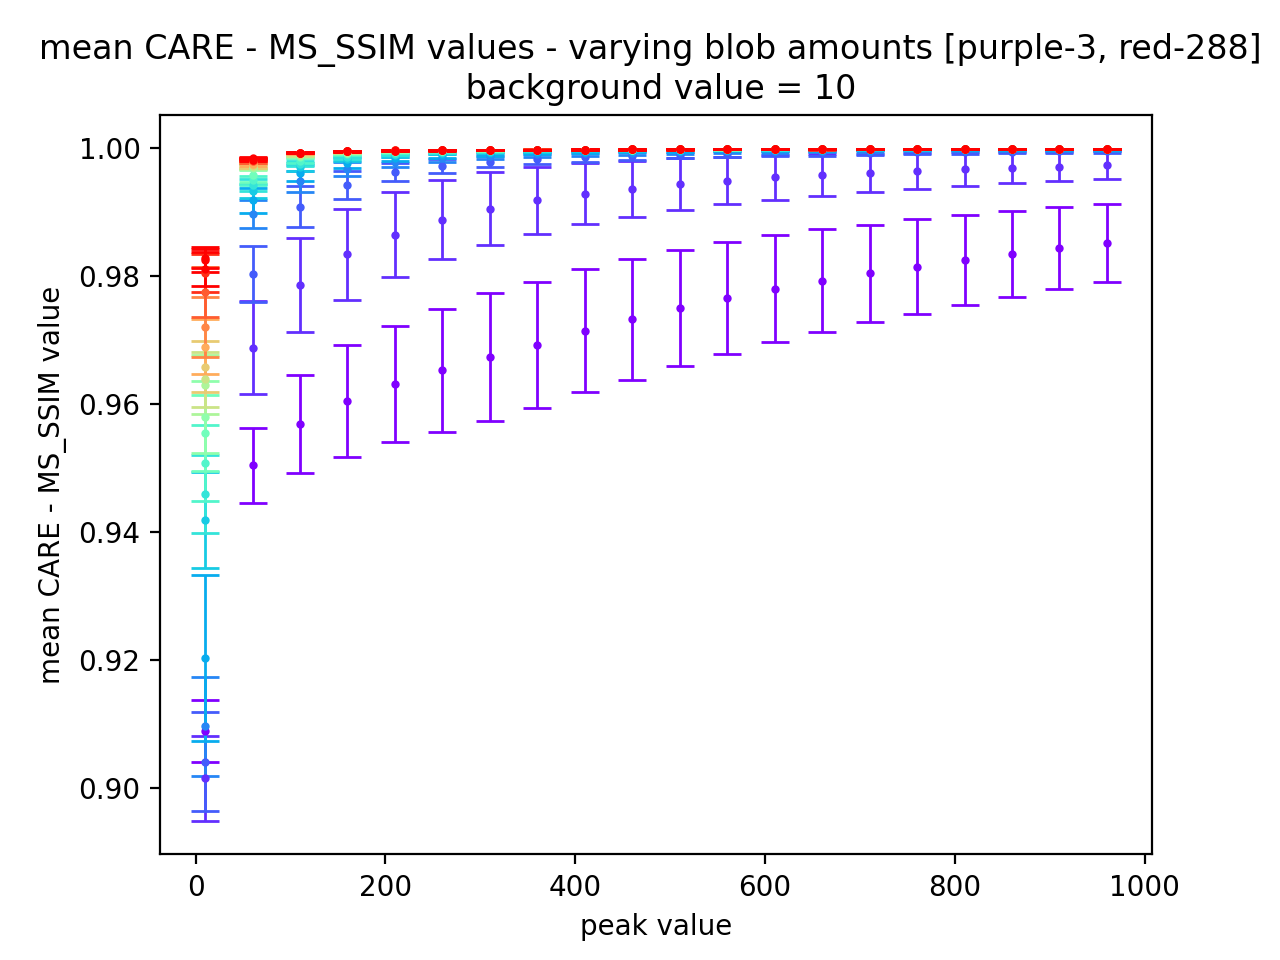

<IPython.core.display.Javascript object>


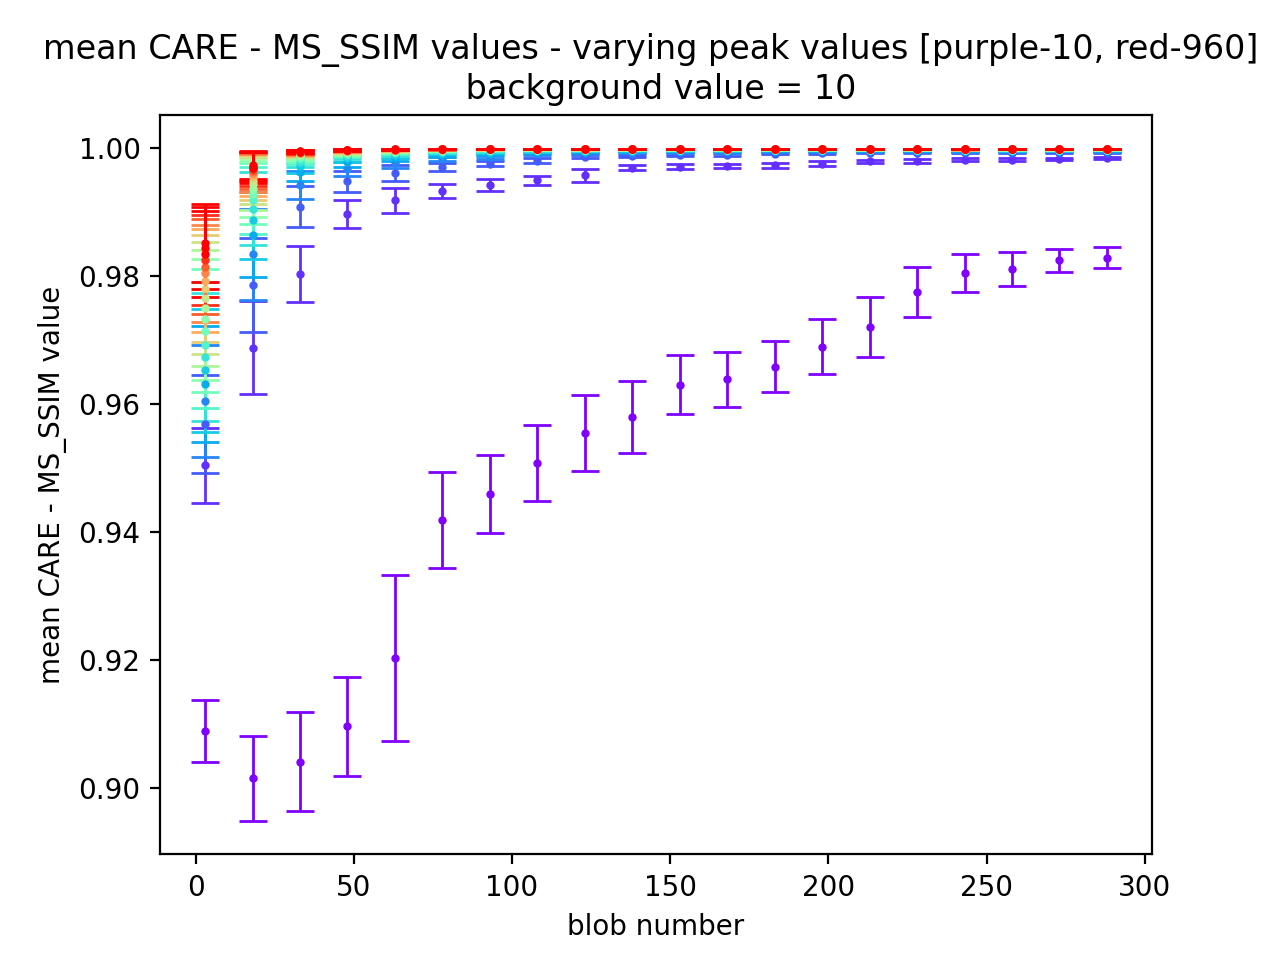

In [20]:
# CARE: -MS_SSIM-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_MS_SSIM_CARE, indices, 'CARE - MS_SSIM')